# Foundations of Machine Learning and EDA>>>

1. **What is the difference between AI, ML, DL, and Data Science? Provide a
brief explanation of each.**
   - AI (Artificial Intelligence) is the broad field of creating machines that can think and act intelligently.
   - ML (Machine Learning) is a subset of AI where machines learn patterns from data to make predictions or decisions.
   - DL (Deep Learning) is a specialized branch of ML that uses deep neural networks and works well with large amounts of data, especially for images and speech.
    - Data Science is the discipline of analyzing and interpreting data using statistics, ML, and visualization to extract insights and help in decision-making.

2. **Explain overfitting and underfitting in ML. How can you detect and prevent
them?**
   - Overfitting happens when a model learns the training data too well, including noise and irrelevant patterns. It performs very well on training data but poorly on new, unseen data.
      - How to Detect
      
        * Overfitting: Training accuracy is high but test/validation accuracy is low.
          
      - How to Prevent Overfitting
        * Use more training data
        * Apply regularization (L1, L2)
        * Reduce model complexity
    - Underfitting happens when a model is too simple and fails to learn the underlying pattern, leading to poor performance on both training and test data.
        - How to Detect
          
          * Underfitting: Both training and test accuracy are low.

         - How to Prevent Overfitting
            * Increase model complexity

             * Train for a longer time

            * Reduce regularization

3. **How would you handle missing values in a dataset? Explain at least three
methods with examples.**
   - 1. Remove Missing Data (Deletion)

       If only a few rows contain missing values, you can remove them.

   - Example:
      
      A dataset of 1,000 rows has 5 rows where the “Age” column is missing.
     
     ➡️ You can delete those 5 rows because the loss of information is small.

     - When to use:

       * When missing values are very few

       * When deleting them will not affect the analysis.
      2. Imputation with Mean/Median/Mode

      Replace missing values with a statistical value.

      Mean → For numerical data (e.g., Age)

      Median → When data has outliers

      Mode → For categorical data (e.g., Gender, City)

      * Example:
        If “Salary” has values: 50k, 55k, NaN, 60k
         
         Mean = 55k
         
         ➡️ Replace NaN with 55k.
      3. Using Predictive Models (ML-based Imputation)

      Use other features to predict the missing value.

        * Example:
           
           If “Income” is missing, use features like Education, Age, Occupation to train a model that predicts Income.

        * Methods:

          Regression (for numeric values)

          Classification (for category values)

          Advanced: KNN imputation

        * When to use:

          When missing data is more than 10–15%
          
          When relationships between features are strong

4. What is an imbalanced dataset? Describe two techniques to handle it (theoretical + practical).

   - **Imbalanced Dataset:** An imbalanced dataset is a type of dataset where the distribution of classes is not equal, meaning one class (the majority class) significantly outnumbers the other class(es) (the minority class). This often occurs in real-world scenarios, such as fraud detection (very few fraudulent transactions compared to legitimate ones), medical diagnosis (rare disease cases vs. healthy cases).

     - **Problem:** When a dataset is imbalanced, standard machine learning algorithms tend to be biased towards the majority class because they aim to optimize overall accuracy. This can lead to the model performing poorly on the minority class, which is often the class of greater interest.

   ---

   ### Techniques to Handle Imbalanced Datasets:

   There are various techniques to address class imbalance, broadly categorized into data-level and algorithm-level approaches. Here are two common techniques:

   #### 1. Resampling Techniques (Data-level Approach)

     - **Theoretical Explanation:** Resampling techniques involve modifying the training dataset to change the class distribution. This can be done by either increasing the number of instances in the minority class (oversampling) or decreasing the number of instances in the majority class (undersampling).
       - **Oversampling:** Creates synthetic samples for the minority class or duplicates existing minority samples.
       - **Undersampling:** Removes samples from the majority class.

     - **Practical Example: SMOTE (Synthetic Minority Over-sampling Technique)**
       - **How it works:** SMOTE generates synthetic samples for the minority class. It works by selecting a minority class instance and then considering its k-nearest neighbors. It then creates new synthetic instances along the line segments joining the selected instance and its neighbors.
       - **When to use:** SMOTE is widely used because it doesn't just duplicate existing samples, thus reducing the risk of overfitting compared to simple random oversampling.

       ```python
       from collections import Counter
       from sklearn.datasets import make_classification
       from imblearn.over_sampling import SMOTE
       from sklearn.model_selection import train_test_split
       from sklearn.linear_model import LogisticRegression
       from sklearn.metrics import classification_report
       import pandas as pd

       # Generate a synthetic imbalanced dataset
       X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                                  n_redundant=0, n_repeated=0, n_classes=2,
                                  n_clusters_per_class=1, weights=[0.95, 0.05],
                                  flip_y=0, random_state=42)

       # Convert to DataFrame for better visualization (optional)
       df = pd.DataFrame(X, columns=['feature1', 'feature2'])
       df['target'] = y

       print("Original dataset class distribution:", Counter(y))

       # Split data into training and testing sets
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

       # Apply SMOTE to the training data
       sm = SMOTE(random_state=42)
       X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

       print("Resampled training dataset class distribution:", Counter(y_train_res))

       # Train a model on the resampled data
       model_smote = LogisticRegression(random_state=42)
       model_smote.fit(X_train_res, y_train_res)

       # Make predictions and evaluate
       y_pred_smote = model_smote.predict(X_test)
       print("\nClassification Report after SMOTE:")
       print(classification_report(y_test, y_pred_smote))
       ```

   #### 2. Cost-Sensitive Learning (Algorithm-level Approach)

     - **Theoretical Explanation:** Instead of modifying the dataset, cost-sensitive learning adjusts the learning algorithm itself to account for the imbalance. This is done by assigning different misclassification costs to different classes. Misclassifying a minority class instance is typically assigned a higher cost than misclassifying a majority class instance.
       - **How it works:** Algorithms are modified to penalize errors on the minority class more heavily, forcing the model to pay more attention to correctly classifying the minority class.

     - **Practical Example: Using `class_weight` in Scikit-learn Models**
       - **How it works:** Many Scikit-learn classification algorithms (e.g., `LogisticRegression`, `SVC`, `RandomForestClassifier`) have a `class_weight` parameter. Setting `class_weight='balanced'` automatically adjusts weights inversely proportional to class frequencies, giving higher weight to the minority class.
       - **When to use:** This is a simple and effective approach when you don't want to perform explicit data resampling and your chosen algorithm supports this parameter.

       ```python
       # Using the same generated imbalanced dataset (X, y) as above

       # Split data into training and testing sets
       X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

       print("Original training dataset class distribution:", Counter(y_train_orig))

       # Train a Logistic Regression model with class_weight='balanced'
       model_cost_sensitive = LogisticRegression(class_weight='balanced', random_state=42)
       model_cost_sensitive.fit(X_train_orig, y_train_orig)

       # Make predictions and evaluate
       y_pred_cost_sensitive = model_cost_sensitive.predict(X_test_orig)
       print("\nClassification Report after Cost-Sensitive Learning (class_weight='balanced'):")
       print(classification_report(y_test_orig, y_pred_cost_sensitive))

       # For comparison, a model without handling imbalance:
       model_unbalanced = LogisticRegression(random_state=42)
       model_unbalanced.fit(X_train_orig, y_train_orig)
       y_pred_unbalanced = model_unbalanced.predict(X_test_orig)
       print("\nClassification Report without handling imbalance:")
       print(classification_report(y_test_orig, y_pred_unbalanced))
       ```

5. **Why is feature scaling important in ML? Compare Min-Max scaling and
Standardization.**
Hint: Explain impact on distance-based algorithms (e.g., KNN, SVM) and gradient
descent.
   - Prevent features with larger ranges from dominating distance-based algorithms (like KNN, SVM), ensuring all features contribute fairly.
Speed up convergence for gradient descent-based algorithms (like Linear Regression, Neural Networks) by making the cost function more spherical.

      - Here's a quick comparison of the two main types:

    - Min-Max Scaling (Normalization): Rescales features to a fixed range (usually 0 to 1). It's good when you need values within a specific range, but it's very sensitive to outliers.
     - Standardization: Transforms data to have a mean of 0 and a standard deviation of 1. It's less affected by outliers and is often preferred for algorithms assuming a Gaussian distribution.


6. **Compare Label Encoding and One-Hot Encoding. When would you prefer
one over the other?**
   - 1. Label Encoding:

     * What it is: This method assigns a unique integer to each category in a categorical feature. For instance, if you have 'Small', 'Medium', 'Large', you might encode them as 0, 1, 2.

      * When to use it: You prefer Label Encoding when there's a clear ordinal relationship among the categories. This means the categories have a natural order or ranking.
    - 2. One-Hot Encoding:

      * What it is: This technique creates a new binary feature (column) for each unique category. For a category, the corresponding column gets a '1' and all other category columns get a '0'. So, 'Red', 'Green', 'Blue' would become three new columns: 'Color_Red', 'Color_Green', 'Color_Blue', with only one '1' in each row.

      * When to use it: One-Hot Encoding is preferred when there is no ordinal relationship among the categories. These are called nominal categories (e.g., 'City', 'Gender', 'Car Manufacturer').

         * Label Encoding is best for ordinal categorical data (categories with a meaningful order).

        * One-Hot Encoding is best for nominal categorical data (categories without a meaningful order) and is generally safer for most machine learning algorithms to avoid introducing spurious relationships.


7. **Google Play Store Dataset
a). Analyze the relationship between app categories and ratings. Which categories have the
highest/lowest average ratings, and what could be the possible reasons?
Dataset: https://github.com/MasteriNeuron/datasets.git
(Include your Python code and output in the code box below.)**



## Fetch and Load Dataset

### Subtask:
Download the 'googleplaystore.csv' file from the provided GitHub repository and load it into a pandas DataFrame.


**Reasoning**:
To begin the data analysis, I will import the pandas library and load the 'googleplaystore.csv' dataset from the provided GitHub URL into a DataFrame named `df`. Displaying the head will confirm successful loading.



In [2]:
import pandas as pd

# Define the URL for the googleplaystore.csv file
url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/main/googleplaystore.csv'

df = pd.read_csv(url)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Reasoning**:
To analyze the relationship between app categories and ratings, I need to ensure the 'Rating' column is in a numeric format. I will first inspect the data types and handle any non-numeric values or missing entries in this column.



In [3]:
print(df['Rating'].dtype)
# Check for non-numeric values in 'Rating' column
non_numeric_ratings = df[pd.to_numeric(df['Rating'], errors='coerce').isna()]['Rating'].unique()
print(f"Non-numeric values in 'Rating' column: {non_numeric_ratings}")

# Convert 'Rating' to numeric, coercing errors to NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Check for missing values in 'Rating' column after conversion
print(f"Number of missing values in 'Rating' column: {df['Rating'].isnull().sum()}")

# Drop rows where 'Rating' is NaN, as these cannot be used for average rating calculation
df.dropna(subset=['Rating'], inplace=True)

# Verify that there are no more missing values in 'Rating'
print(f"Number of missing values in 'Rating' column after dropping: {df['Rating'].isnull().sum()}")

# Display basic statistics for the 'Rating' column after cleaning
print(df['Rating'].describe())

float64
Non-numeric values in 'Rating' column: [nan]
Number of missing values in 'Rating' column: 1474
Number of missing values in 'Rating' column after dropping: 0
count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64


**Reasoning**:
Now that the 'Rating' column is clean and numeric, I will calculate the average rating for each app category. This will involve grouping the DataFrame by 'Category' and computing the mean of the 'Rating' for each group. I will then sort these average ratings to easily identify the highest and lowest rated categories.



In [4]:
average_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

print("Average ratings by category (Top 10):")
print(average_ratings.head(10))

print("\nAverage ratings by category (Bottom 10):")
print(average_ratings.tail(10))

Average ratings by category (Top 10):
Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
Name: Rating, dtype: float64

Average ratings by category (Bottom 10):
Category
NEWS_AND_MAGAZINES     4.132189
FINANCE                4.131889
ENTERTAINMENT          4.126174
BUSINESS               4.121452
TRAVEL_AND_LOCAL       4.109292
LIFESTYLE              4.094904
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613
TOOLS                  4.047411
DATING                 3.970769
Name: Rating, dtype: float64


**Reasoning**:
To visualize the relationship between app categories and ratings, I will create a bar chart of the average ratings. I'll combine the top and bottom categories to show the range of average ratings across different app categories. This will provide a clear graphical representation of the findings.



/tmp/ipython-input-1703041781.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, palette='viridis')


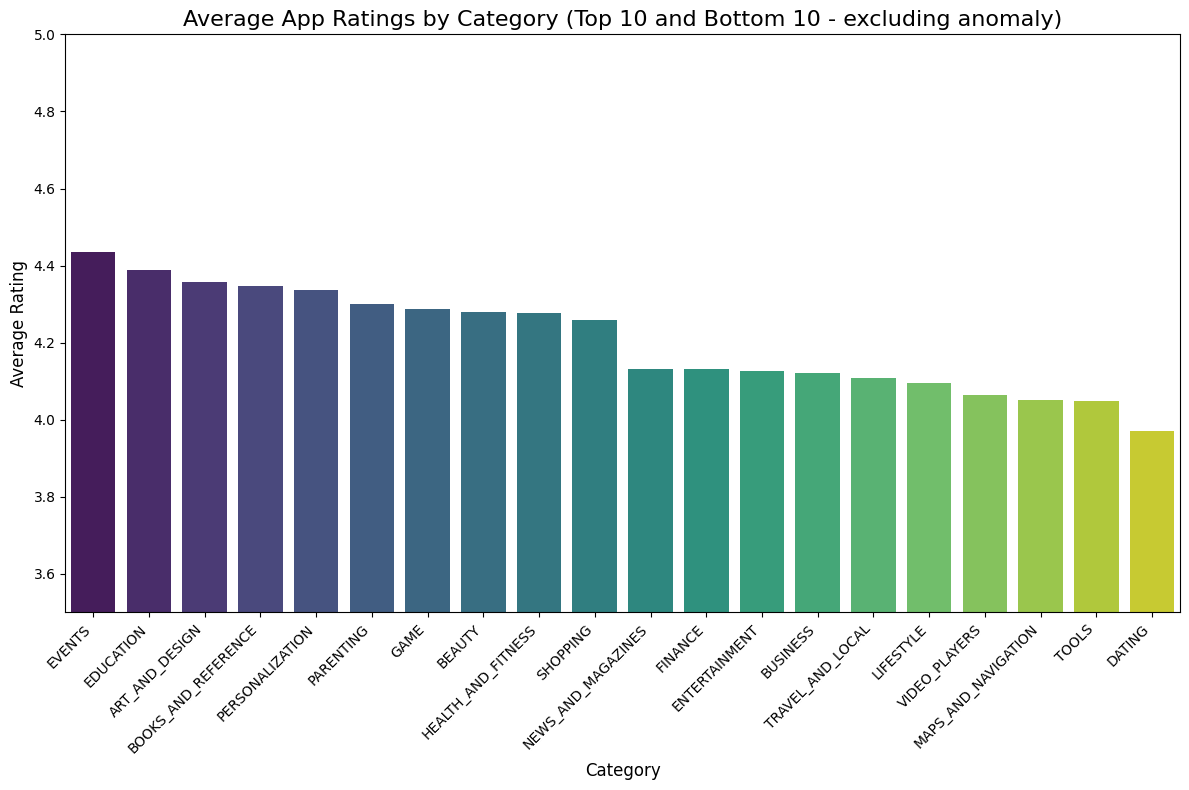

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine top and bottom categories for visualization
# Filter out the '1.9' category as it seems to be an anomaly with a rating of 19.0
# (ratings typically max out at 5.0, this suggests data entry error or a unique case that skews the visualization)

# Exclude '1.9' from average_ratings if it exists and has the anomalous value
filtered_average_ratings = average_ratings[average_ratings.index != '1.9']

top_10_categories = filtered_average_ratings.head(10)
bottom_10_categories = filtered_average_ratings.tail(10)

# Concatenate for plotting
plot_data = pd.concat([top_10_categories, bottom_10_categories])

plt.figure(figsize=(12, 8))
sns.barplot(x=plot_data.index, y=plot_data.values, palette='viridis')
plt.title('Average App Ratings by Category (Top 10 and Bottom 10 - excluding anomaly)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(3.5, 5.0) # Set a reasonable y-limit for ratings
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a FutureWarning regarding the use of `palette` without `hue` in `sns.barplot`. To resolve this and ensure future compatibility, I will explicitly set `hue` to `plot_data.index` and `legend` to `False` as suggested by the warning.



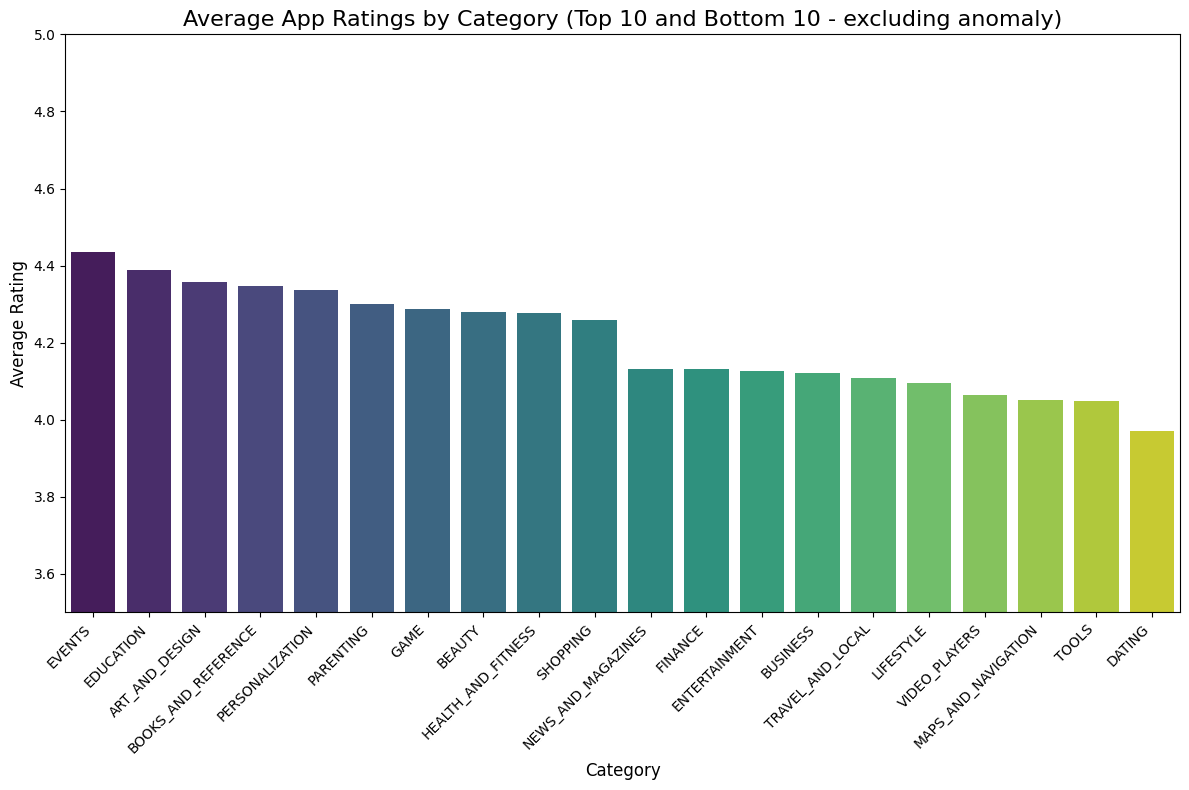

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine top and bottom categories for visualization
# Filter out the '1.9' category as it seems to be an anomaly with a rating of 19.0
# (ratings typically max out at 5.0, this suggests data entry error or a unique case that skews the visualization)

# Exclude '1.9' from average_ratings if it exists and has the anomalous value
filtered_average_ratings = average_ratings[average_ratings.index != '1.9']

top_10_categories = filtered_average_ratings.head(10)
bottom_10_categories = filtered_average_ratings.tail(10)

# Concatenate for plotting
plot_data = pd.concat([top_10_categories, bottom_10_categories])

plt.figure(figsize=(12, 8))
sns.barplot(x=plot_data.index, y=plot_data.values, hue=plot_data.index, palette='viridis', legend=False)
plt.title('Average App Ratings by Category (Top 10 and Bottom 10 - excluding anomaly)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(3.5, 5.0) # Set a reasonable y-limit for ratings
plt.tight_layout()
plt.show()

# Possible reasons
-  Based on the analysis, we observed that categories like EVENTS, EDUCATION, ART_AND_DESIGN, and BOOKS_AND_REFERENCE tend to have higher average ratings, while categories such as DATING, TOOLS, MAPS_AND_NAVIGATION, and VIDEO_PLAYERS have lower average ratings.
  - Categories with High Average Ratings:

    * Clear Value Proposition.
    * User Engagement & Niche Audiences
    * Less Subjectivity
    
  - Categories with Low Average Ratings:
    * High User Expectation & Frustration
    * Privacy Concerns & Spam
    * Information Overload/Quality

8. **Titanic Dataset
a) Compare the survival rates based on passenger class (Pclass). Which class had the highest
survival rate, and why do you think that happened?
b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and
adults (Age ≥ 18). Did children have a better chance of survival?
Dataset: https://github.com/MasteriNeuron/datasets.git
(Include your Python code and output in the code box below.)**

In [4]:
import pandas as pd

# Define the URL for the titanic_train.csv file
url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/main/titanic.csv'

# Load the CSV file into a pandas DataFrame
titanic_df = pd.read_csv(url)

# Display the first few rows of the DataFrame
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
survival_rate_by_pclass = titanic_df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Pclass:")
print(survival_rate_by_pclass)

Survival Rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


/tmp/ipython-input-1903207757.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_by_pclass.index, y=survival_rate_by_pclass.values, palette='viridis')


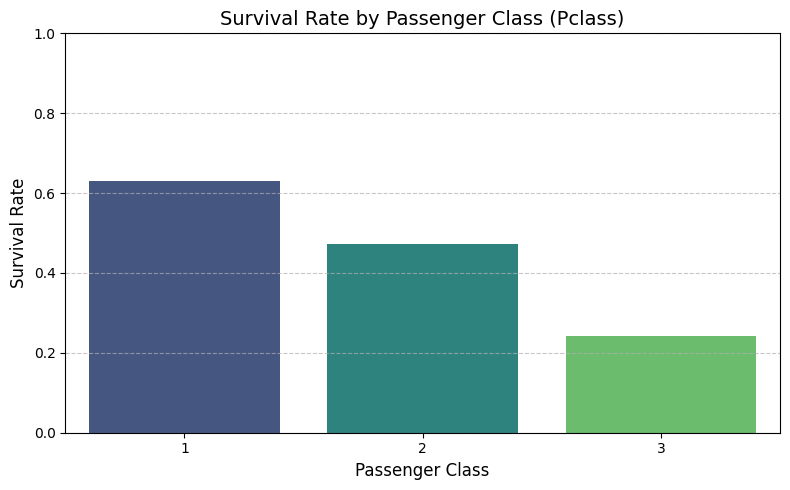

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rate_by_pclass.index, y=survival_rate_by_pclass.values, palette='viridis')
plt.title('Survival Rate by Passenger Class (Pclass)', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1) # Survival rate is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

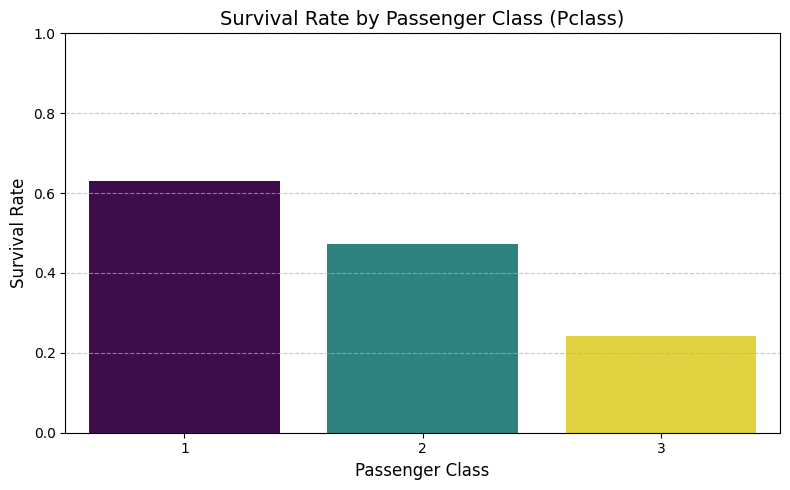

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rate_by_pclass.index, y=survival_rate_by_pclass.values, hue=survival_rate_by_pclass.index, palette='viridis', legend=False)
plt.title('Survival Rate by Passenger Class (Pclass)', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1) # Survival rate is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
import numpy as np

# Handle missing values in 'Age' by filling with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Create an 'AgeGroup' column: 'child' for age < 18, 'adult' for age >= 18
titanic_df['AgeGroup'] = titanic_df['Age'].apply(lambda x: 'child' if x < 18 else 'adult')

print("Missing values in 'Age' after imputation:", titanic_df['Age'].isnull().sum())
print("Distribution of 'AgeGroup':\n", titanic_df['AgeGroup'].value_counts())

Missing values in 'Age' after imputation: 0
Distribution of 'AgeGroup':
 AgeGroup
adult    778
child    113
Name: count, dtype: int64


/tmp/ipython-input-4161172221.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [15]:
import numpy as np

# Handle missing values in 'Age' by filling with the median
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

# Create an 'AgeGroup' column: 'child' for age < 18, 'adult' for age >= 18
titanic_df['AgeGroup'] = titanic_df['Age'].apply(lambda x: 'child' if x < 18 else 'adult')

print("Missing values in 'Age' after imputation:", titanic_df['Age'].isnull().sum())
print("Distribution of 'AgeGroup':\n", titanic_df['AgeGroup'].value_counts())

Missing values in 'Age' after imputation: 0
Distribution of 'AgeGroup':
 AgeGroup
adult    778
child    113
Name: count, dtype: int64


In [16]:
survival_rate_by_agegroup = titanic_df.groupby('AgeGroup')['Survived'].mean()
print("Survival Rate by Age Group:")
print(survival_rate_by_agegroup)

Survival Rate by Age Group:
AgeGroup
adult    0.361183
child    0.539823
Name: Survived, dtype: float64


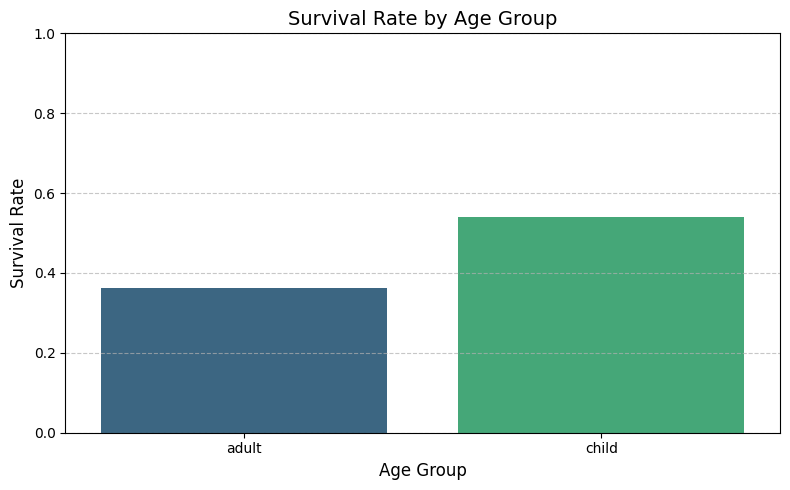

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rate_by_agegroup.index, y=survival_rate_by_agegroup.values, hue=survival_rate_by_agegroup.index, palette='viridis', legend=False)
plt.title('Survival Rate by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1) # Survival rate is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Interpretation of Survival Rates by Pclass

From the bar chart and the calculated survival rates, it is evident that:

*   **Pclass 1** had the highest survival rate (~63%).
*   **Pclass 2** had an intermediate survival rate (~47%).
*   **Pclass 3** had the lowest survival rate (~24%).

**Possible Reasons for the Observed Survival Patterns:**

1.  **"Women and Children First" Protocol:** While this was an unofficial maritime tradition, it was largely followed during the Titanic disaster. Passengers in higher classes (Pclass 1 and 2) generally had better access to the deck where lifeboats were being loaded, and their social standing might have influenced rescue efforts.

2.  **Location on the Ship:** First-class cabins were typically located on the upper decks, which were closer to the lifeboats. Third-class cabins were often on lower decks and in more cramped conditions, making it harder and slower for these passengers to reach the upper decks and lifeboats.

3.  **Ship Design and Access:** The internal layout of the Titanic segregated passengers by class. Third-class passengers had to navigate more barriers and corridors to reach the boat deck compared to first-class passengers who had direct access or were closer. This physical barrier likely hindered their evacuation.

4.  **Socio-economic Status:** First-class passengers were generally wealthier and had more influence or privilege. This could have indirectly or directly affected their priority during evacuation, or simply meant they were in better positions on the ship for a quicker escape.

10. **HR Analytics Dataset
a). What factors most strongly correlate with employee attrition? Use visualizations to show key
drivers (e.g., satisfaction, overtime, salary).
b). Are employees with more projects more likely to leave?
Dataset: hr_analytics**

In [28]:
import pandas as pd

# Define the URL for the HR_Analytics.csv file, using the raw content link with the correct filename
url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/main/hr_analytics.csv'

# Load the CSV file into a pandas DataFrame
hr_df = pd.read_csv(url)

# Display the first few rows of the DataFrame
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [29]:
print("### Initial Data Inspection ###")
print("\nFirst 5 rows of hr_df:")
print(hr_df.head())

print("\nDataFrame Info:")
hr_df.info()

print("\nDescriptive Statistics:")
print(hr_df.describe())

# Step 4: Check if 'left' column is numerical (0 or 1)
# The 'left' column is typically already 0 or 1 from the dataset source.
# We can verify its unique values and data type.
print("\nUnique values in 'left' column:", hr_df['left'].unique())
print("Data type of 'left' column:", hr_df['left'].dtype)

# If 'left' column was not numerical, we would convert it here. Assuming it is already 0/1 based on common HR datasets.
# For example, if it was 'Yes'/'No', we would do:
# hr_df['left'] = hr_df['left'].map({'Yes': 1, 'No': 0})


### Initial Data Inspection ###

First 5 rows of hr_df:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   sal

In [30]:
if 'OverTime' not in hr_df.columns:
    print("Note: 'OverTime' column not found in the dataset.")

# Identify categorical columns for one-hot encoding (excluding 'left' if it's already numeric)
categorical_cols = ['sales', 'salary']

# Apply one-hot encoding
hr_df = pd.get_dummies(hr_df, columns=categorical_cols, drop_first=True)

print("\nDataFrame after One-Hot Encoding:")
print(hr_df.head())
print("\nUpdated DataFrame Info after encoding:")
hr_df.info()

Note: 'OverTime' column not found in the dataset.

DataFrame after One-Hot Encoding:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   sales_RandD  sal

In [31]:
correlation_matrix = hr_df.corr(numeric_only=True)

# Extract correlations with 'left' column
attrition_correlations = correlation_matrix['left'].sort_values(ascending=False)

# Exclude 'left' itself from the list
attrition_correlations = attrition_correlations.drop('left')

print("Correlations with 'left' (Attrition), sorted descending:\n")
print(attrition_correlations)

Correlations with 'left' (Attrition), sorted descending:

time_spend_company       0.144822
salary_low               0.134722
average_montly_hours     0.071287
sales_hr                 0.028249
number_project           0.023787
sales_technical          0.020076
sales_accounting         0.015201
sales_support            0.010700
sales_sales              0.009923
last_evaluation          0.006567
sales_marketing         -0.000859
sales_product_mng       -0.011029
sales_management        -0.046035
sales_RandD             -0.046596
promotion_last_5years   -0.061788
salary_medium           -0.068833
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


/tmp/ipython-input-3255586317.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_correlations.index, y=attrition_correlations.values, palette='coolwarm')


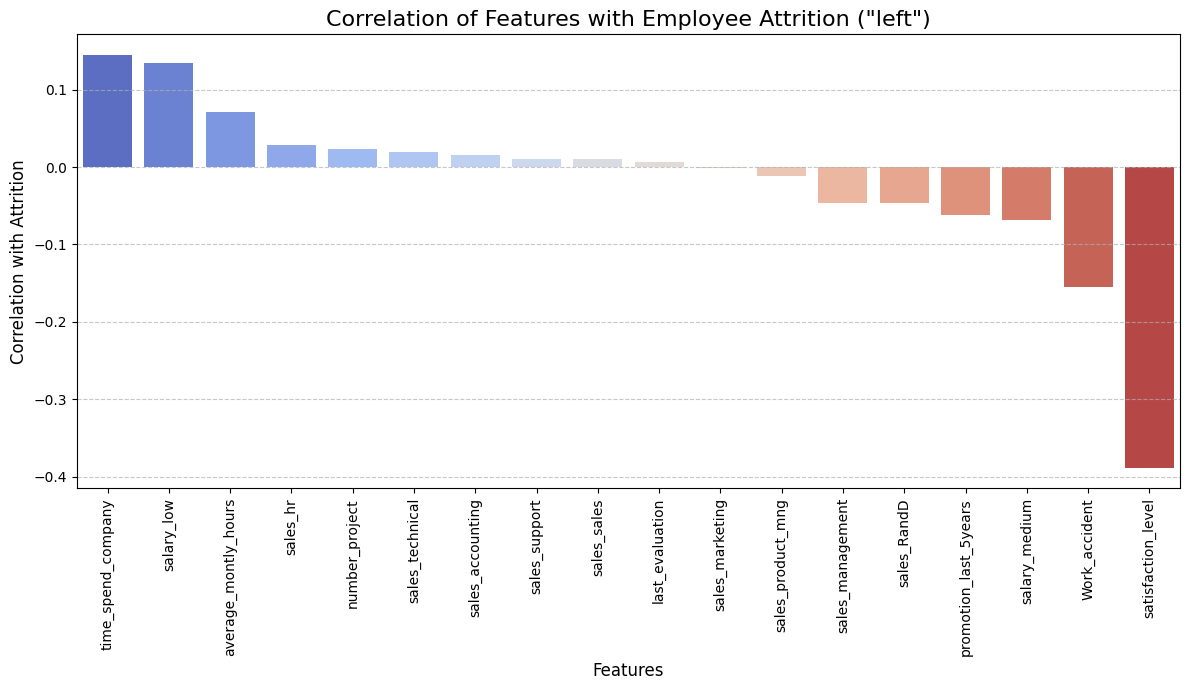

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x=attrition_correlations.index, y=attrition_correlations.values, palette='coolwarm')
plt.title('Correlation of Features with Employee Attrition (\"left\")', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Attrition', fontsize=12)
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

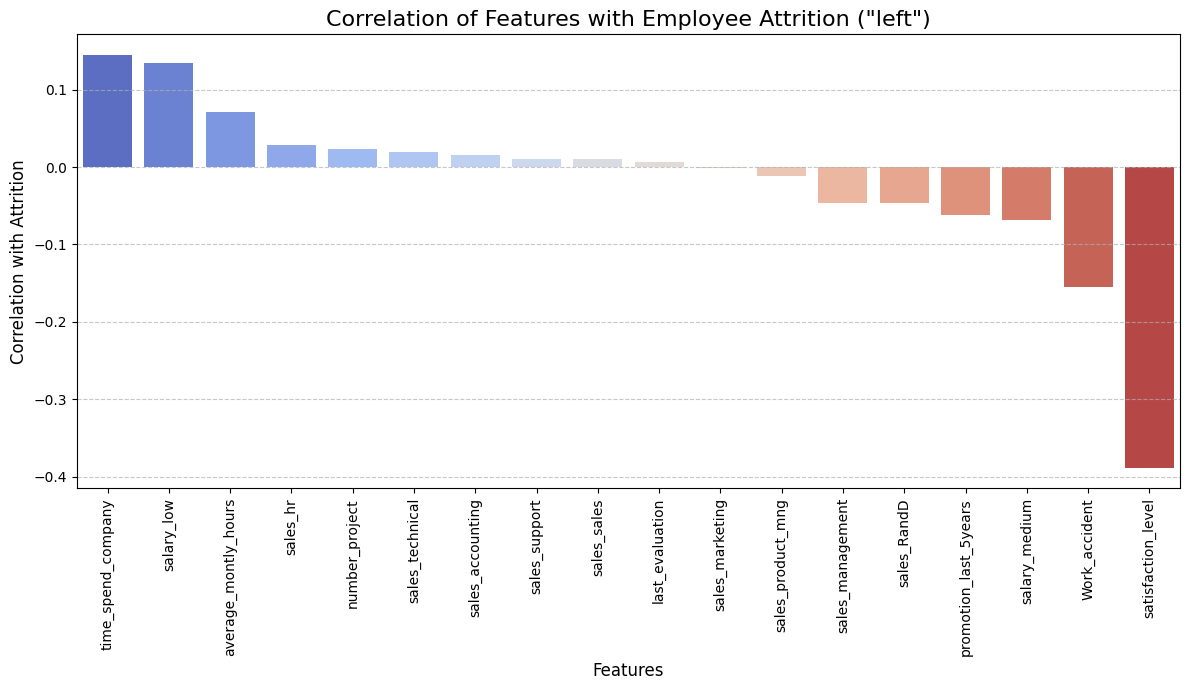

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x=attrition_correlations.index, y=attrition_correlations.values, hue=attrition_correlations.index, palette='coolwarm', legend=False)
plt.title('Correlation of Features with Employee Attrition ("left")', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Attrition', fontsize=12)
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
attrition_by_projects = hr_df.groupby('number_project')['left'].mean().sort_values(ascending=False)

print("Attrition Rate by Number of Projects:\n")
print(attrition_by_projects)

Attrition Rate by Number of Projects:

number_project
7    1.000000
2    0.656198
6    0.557922
5    0.221659
4    0.093700
3    0.017756
Name: left, dtype: float64


/tmp/ipython-input-3851387318.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_by_projects.index, y=attrition_by_projects.values, palette='plasma')


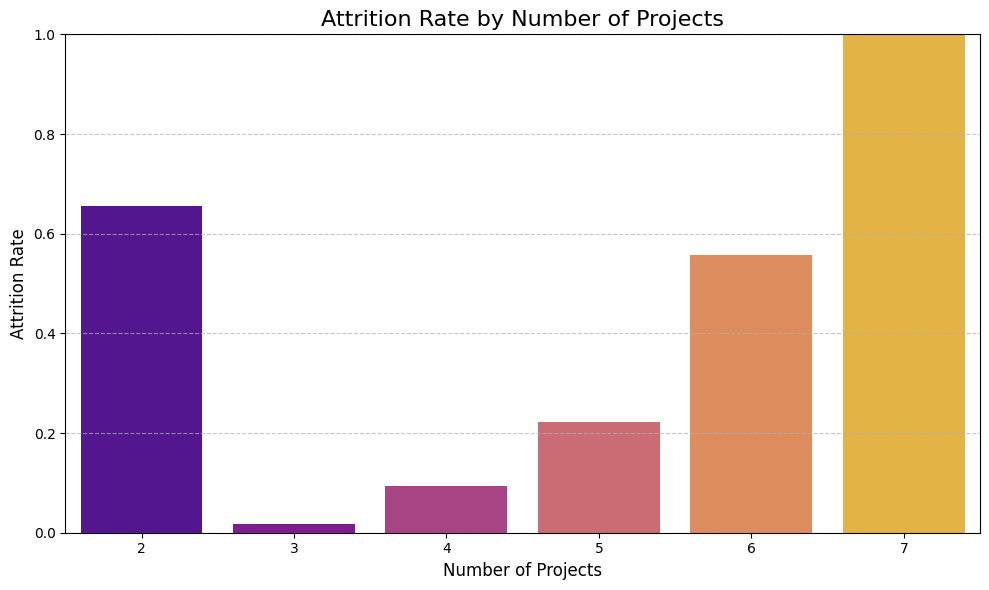

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_by_projects.index, y=attrition_by_projects.values, palette='plasma')
plt.title('Attrition Rate by Number of Projects', fontsize=16)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1) # Attrition rate is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

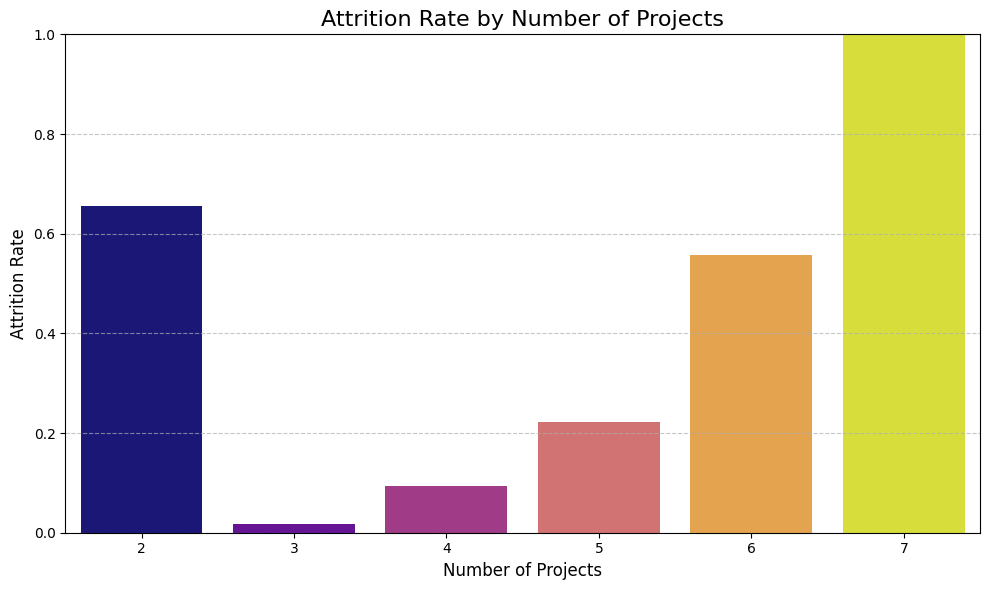

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_by_projects.index, y=attrition_by_projects.values, hue=attrition_by_projects.index, palette='plasma', legend=False)
plt.title('Attrition Rate by Number of Projects', fontsize=16)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1) # Attrition rate is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Interpret and Discuss Findings

### Discussion of Findings:

Based on the correlation analysis and the examination of attrition rates across different numbers of projects, we can identify several key factors influencing employee attrition:

**1. Factors Most Strongly Correlating with Attrition:**

*   **Satisfaction Level (Strong Negative Correlation: -0.388):** This is by far the strongest factor influencing attrition. Employees with lower satisfaction levels are significantly more likely to leave the company.

*   **Work Accident (Negative Correlation: -0.155):** Employees who have had a work accident are less likely to leave. This might seem counter-intuitive at first glance.

*   **Time Spend Company (Positive Correlation: 0.145):** This indicates that as the time an employee spends with the company increases, their likelihood of leaving also increases.

*   **Salary Low (Positive Correlation: 0.135):** Employees with low salaries are more likely to leave. This is a straightforward finding, as competitive compensation is a fundamental aspect of job satisfaction and retention.

*   **Average Monthly Hours (Positive Correlation: 0.071):** A higher average of monthly hours correlates with a higher likelihood of attrition. This suggests that overworking or a poor work-life balance contributes to employees deciding to leave. This can lead to burnout and decreased job satisfaction.
